In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

digits = load_digits()

In [4]:
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


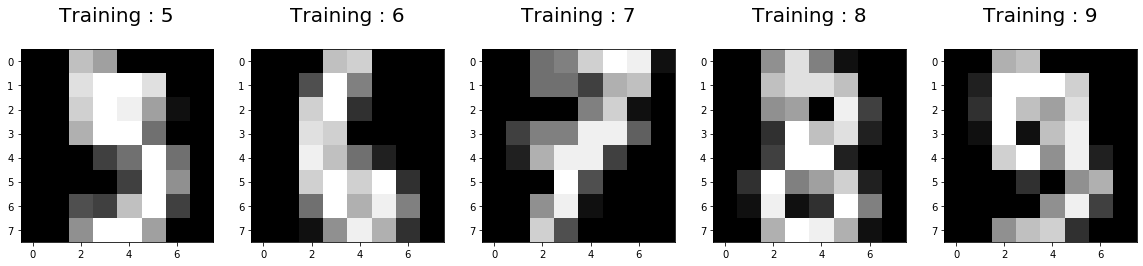

In [8]:
#displaying some of the image and labels

plt.figure(figsize = (20,4))

for index, (image, label) in enumerate(zip(digits.data[5:10], digits.target[5:10])) :
    plt.subplot(1, 5, index +1)
    plt.imshow(np.reshape(image, (8, 8)), cmap = plt.cm.gray)
    plt.title("Training : %i\n" % label, fontsize = 20)

In [9]:
#dividing dataset into training and test set

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.23, random_state = 2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1383, 64)
(1383,)
(414, 64)
(414,)


In [10]:
#Making an instance of the model and training it
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

C:\Users\Bagus\.conda\envs\tensorflow-sessions\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bagus\.conda\envs\tensorflow-sessions\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
#predicting the output of the first element of the test set
print(logisticRegr.predict(x_test[0].reshape(1, -1)))

[4]


In [13]:
#predicting the output of the first 10 elements of the test set
logisticRegr.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [17]:
#predicting for the entire dataset
pred  = logisticRegr.predict(x_test)

#determining the accuracy of the model
score = logisticRegr.score(x_test, y_test)
score

0.9420289855072463

(0, 10)

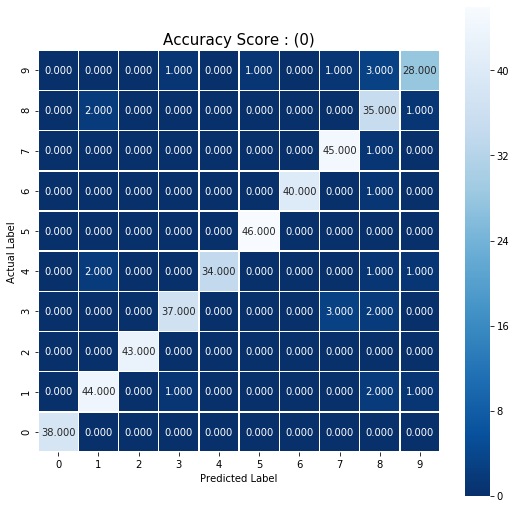

In [21]:
#representing the confusion matrix in a heat map
cm = metrics.confusion_matrix(y_test, pred)

plt.figure(figsize = (9,9))
hm = sns.heatmap(cm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "Blues_r")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
all_sample_title = "Accuracy Score : (0)".format(score)
plt.title(all_sample_title, size = 15)

axes = hm.axes
axes.set_ylim(0, cm.shape[0])
axes.set_ylim(0, cm.shape[1])

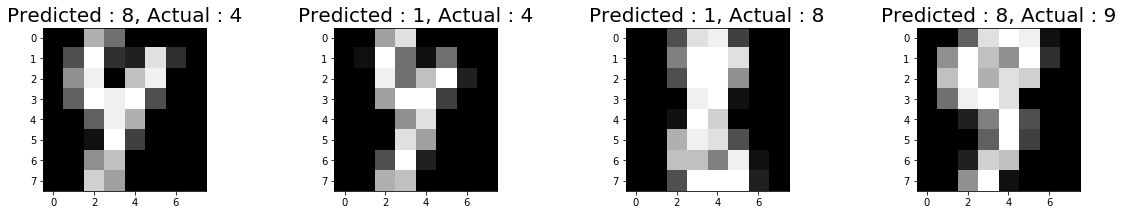

In [24]:
index = 0
misclassifiedIndex = []
for predict, actual in zip(pred, y_test) :
    if predict != actual :
        misclassifiedIndex.append(index)
    index += 1
    
plt.figure(figsize = (20,3))
for plotIndex, wrong in enumerate(misclassifiedIndex[0:4]) :
    plt.subplot(1, 4, plotIndex +1)
    plt.imshow(np.reshape(x_test[wrong], (8, 8)), cmap = plt.cm.gray)
    plt.title("Predicted : {}, Actual : {}".format(pred[wrong], y_test[wrong]), fontsize = 20)